In [1]:
import os, shutil

original_dataset_dir = '/home/alex/下载/学习/data/dogs-vs-cats/train'

base_dir = '/home/alex/下载/学习/data/dogs-vs-cats-small'

os.mkdir(base_dir)

In [2]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [3]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
train_count = 1000
validation_cont = 500
test_count = 500

train_validation_num = train_count + validation_cont
validation_test_num = train_validation_num + test_count

# 1000 -> train
fnames = ['cat.{}.jpg'.format(i) for i in range(train_count)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 500 -> validation
fnames = ['cat.{}.jpg'.format(i) for i in range(train_count, train_validation_num)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 500 -> test
fnames = ['cat.{}.jpg'.format(i) for i in range(train_validation_num, validation_test_num)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 1000 -> train
fnames = ['dog.{}.jpg'.format(i) for i in range(train_count)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 500 -> validation
fnames = ['dog.{}.jpg'.format(i) for i in range(train_count, train_validation_num)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 500 -> test
fnames = ['dog.{}.jpg'.format(i) for i in range(train_validation_num, validation_test_num)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print('猫 的训练集：', len(os.listdir(train_cats_dir)))
print('狗 的训练集：', len(os.listdir(train_dogs_dir)))

print('----------------------------------------------')

print('猫 的验证集：', len(os.listdir(validation_cats_dir)))
print('狗 的验证集：', len(os.listdir(validation_dogs_dir)))

print('----------------------------------------------')

print('猫 的测试集：', len(os.listdir(test_cats_dir)))
print('狗 的测试集：', len(os.listdir(test_dogs_dir)))

print('----------------------------------------------')

猫 的训练集： 1000
狗 的训练集： 1000
----------------------------------------------
猫 的验证集： 500
狗 的验证集： 500
----------------------------------------------
猫 的测试集： 500
狗 的测试集： 500
----------------------------------------------


In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
# 数据预处理
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # 2000 / batch_size
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50  
)

Epoch 1/30
100/100 [==============================] - 113s 1s/step - loss: 0.6922 - acc: 0.5380 - val_loss: 0.6742 - val_acc: 0.6220
Epoch 2/30
100/100 [==============================] - 113s 1s/step - loss: 0.6556 - acc: 0.6140 - val_loss: 0.6881 - val_acc: 0.5320
Epoch 3/30
100/100 [==============================] - 113s 1s/step - loss: 0.6116 - acc: 0.6555 - val_loss: 0.6262 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 111s 1s/step - loss: 0.5700 - acc: 0.6930 - val_loss: 0.5936 - val_acc: 0.6880
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.5317 - acc: 0.7315 - val_loss: 0.5800 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 112s 1s/step - loss: 0.5055 - acc: 0.7425 - val_loss: 0.5665 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 113s 1s/step - loss: 0.4726 - acc: 0.7815 - val_loss: 0.6968 - val_acc: 0.6410
Epoch 8/30
100/100 [==============================] - 113s 1s/step - 

In [16]:
model.save('cats_and_dogs_small.h5')

In [21]:
print(history.history)

{'val_loss': [0.6742253768444061, 0.688109529018402, 0.6262041211128235, 0.5935957312583924, 0.5799635922908783, 0.5665054965019226, 0.6967828923463821, 0.5487845820188523, 0.5619293561577797, 0.5862486493587494, 0.5691039609909058, 0.5592905616760254, 0.756681563258171, 0.602167461514473, 0.6191848760843277, 0.6881372153759002, 0.6665417897701263, 0.8602041006088257, 0.7062323898077011, 0.8537994447350502, 0.7430490362644195, 0.8163042044639588, 0.7844546571373939, 0.8953603285551072, 0.9175127384066581, 0.9939168018102645, 0.9645512104034424, 1.0561464124917983, 1.1655992183089257, 1.4033267837762833], 'val_acc': [0.6220000016689301, 0.5320000022649765, 0.6500000035762787, 0.68799999833107, 0.6910000014305114, 0.7070000004768372, 0.6409999996423721, 0.7099999988079071, 0.7169999992847442, 0.7149999964237214, 0.7129999977350235, 0.7299999940395355, 0.6929999971389771, 0.7179999995231628, 0.7250000023841858, 0.7040000057220459, 0.71799999833107, 0.6879999995231628, 0.7120000028610229, 

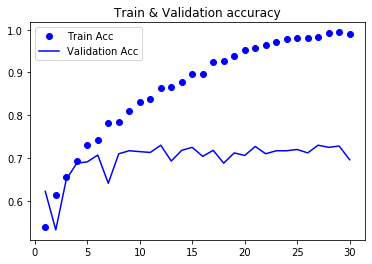

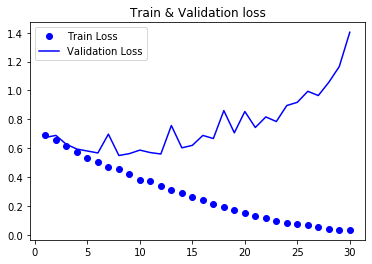

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Train & Validation accuracy')
plt.legend()

plt.savefig("dog_vs_cat_acc.png")

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train & Validation loss')
plt.legend()

plt.savefig("dog_vs_cat_loss.png")
plt.show()

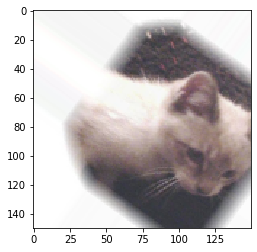

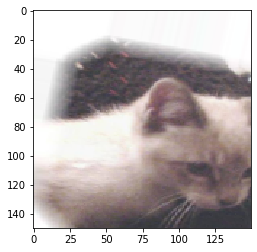

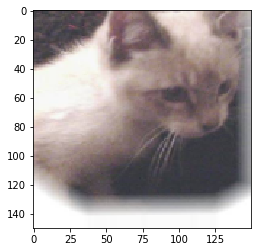

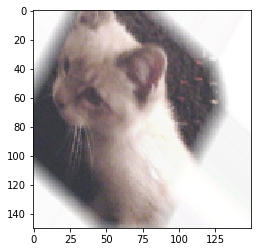

In [29]:
# 训练集较小的时候采用数据增强方式降低过拟合，实现更好泛化能力

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


from keras.preprocessing import image

tnames = [os.path.join(train_cats_dir, tname) for tname in os.listdir(train_cats_dir)]
img_path = tnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [30]:
# dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [31]:
# 数据增强配合dropout
train_datagen_dropout = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen_dropout = ImageDataGenerator(rescale=1./255)

train_generator_dropout = train_datagen_dropout.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator_dropout = test_datagen_dropout.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
    train_generator_dropout,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator_dropout,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 177s 2s/step - loss: 0.6902 - acc: 0.5294 - val_loss: 0.6956 - val_acc: 0.4975
Epoch 2/100
100/100 [==============================] - 182s 2s/step - loss: 0.6768 - acc: 0.5662 - val_loss: 0.6536 - val_acc: 0.6024
Epoch 3/100
100/100 [==============================] - 178s 2s/step - loss: 0.6586 - acc: 0.5956 - val_loss: 0.6298 - val_acc: 0.6206
Epoch 4/100
100/100 [==============================] - 174s 2s/step - loss: 0.6347 - acc: 0.6266 - val_loss: 0.6393 - val_acc: 0.6102
Epoch 5/100
100/100 [==============================] - 175s 2s/step - loss: 0.6209 - acc: 0.6413 - val_loss: 0.6042 - val_acc: 0.6624
Epoch 6/100
100/100 [==============================] - 173s 2s/step - loss: 0.6108 - acc: 0.6603 - val_loss: 0.6011 - val_acc: 0.6553
Epoch 7/100
100/100 [==============================] - 174s 2s/step - loss: 0.6048 - acc: 0.6656 - val_loss: 0.6419 - val_acc: 0.6332
Epoch 8/100
100/100 [==============================] - 186s 2s

Epoch 62/100
100/100 [==============================] - 173s 2s/step - loss: 0.4375 - acc: 0.7966 - val_loss: 0.4430 - val_acc: 0.8001
Epoch 63/100
100/100 [==============================] - 174s 2s/step - loss: 0.4113 - acc: 0.8134 - val_loss: 0.4577 - val_acc: 0.7964
Epoch 64/100
100/100 [==============================] - 173s 2s/step - loss: 0.4311 - acc: 0.8047 - val_loss: 0.4419 - val_acc: 0.7957
Epoch 65/100
100/100 [==============================] - 173s 2s/step - loss: 0.4219 - acc: 0.8047 - val_loss: 0.4237 - val_acc: 0.8052
Epoch 66/100
100/100 [==============================] - 173s 2s/step - loss: 0.4188 - acc: 0.8063 - val_loss: 0.4563 - val_acc: 0.8048
Epoch 67/100
100/100 [==============================] - 173s 2s/step - loss: 0.4181 - acc: 0.7991 - val_loss: 0.4207 - val_acc: 0.8147
Epoch 68/100
100/100 [==============================] - 172s 2s/step - loss: 0.4114 - acc: 0.8047 - val_loss: 0.4798 - val_acc: 0.7912
Epoch 69/100
100/100 [==============================] -

In [ ]:
model.save('cats_and_dogs_small_dropout.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Train & Validation accuracy')
plt.legend()

plt.savefig("dog_vs_cat_acc_dropout.png")

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train & Validation loss')
plt.legend()

plt.savefig("dog_vs_cat_loss_dropout.png")
plt.show()